In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [ ]:
titanic_train = pd.read_csv('titanics.csv') 


In [ ]:
titanic_train.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,22.0,1,0,7.2500,S,0
1,2,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,4,female,35.0,1,0,53.1000,S,1
4,5,male,35.0,0,0,8.0500,S,0


In [ ]:
titanic_train.tail()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
886,887,male,27.0,0,0,13.00,S,0
887,888,female,19.0,0,0,30.00,S,1
888,889,female,NaN,1,2,23.45,S,0
889,890,male,26.0,0,0,30.00,C,1
890,891,male,32.0,0,0,7.75,Q,0


In [ ]:
titanic_train.shape

(891, 8)

In [ ]:
titanic_train.describe

<bound method NDFrame.describe of      PassengerId     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0              1    male  22.0      1      0   7.2500        S         0
1              2  female  38.0      1      0  71.2833        C         1
2              3  female  26.0      0      0   7.9250        S         1
3              4  female  35.0      1      0  53.1000        S         1
4              5    male  35.0      0      0   8.0500        S         0
..           ...     ...   ...    ...    ...      ...      ...       ...
886          887    male  27.0      0      0  13.0000        S         0
887          888  female  19.0      0      0  30.0000        S         1
888          889  female   NaN      1      2  23.4500        S         0
889          890    male  26.0      0      0  30.0000        C         1
890          891    male  32.0      0      0   7.7500        Q         0

[891 rows x 8 columns]>

In [ ]:
titanic_train.isna().any()

PassengerId    False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked        True
Survived       False
dtype: bool

In [ ]:
titanic_train.isna().sum()

PassengerId      0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [ ]:
# encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
titanic_train['Sex']= le.fit_transform(titanic_train['Sex']) 

titanic_train['Embarked']= le.fit_transform(titanic_train['Embarked'].astype(str)) 

In [ ]:
titanic_train.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,22.0,1,0,7.2500,2,0
1,2,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,4,0,35.0,1,0,53.1000,2,1
4,5,1,35.0,0,0,8.0500,2,0


In [ ]:
titanic_train.isna().any()

PassengerId    False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked       False
Survived       False
dtype: bool

In [ ]:
titanic_train.replace('?',np.NaN,inplace=True)


In [ ]:
# handling missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN)
imp=imp.fit(titanic_train[['Age']])
titanic_train['Age']=imp.transform(titanic_train[['Age']]).ravel()

In [ ]:
titanic_train.isna().any()

PassengerId    False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Survived       False
dtype: bool

In [ ]:
titanic_train.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,22.0,1,0,7.2500,2,0
1,2,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,4,0,35.0,1,0,53.1000,2,1
4,5,1,35.0,0,0,8.0500,2,0


In [ ]:
titanic_train.describe()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721,0.383838
std,257.353842,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [ ]:
titanic_train.corr()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,1.000000,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083,-0.005007
Sex,0.042939,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057,-0.543351
Age,0.033207,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239,-0.069809
SibSp,-0.057527,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654,-0.035322
Parch,-0.001652,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322,0.081629
Fare,0.012658,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226,0.257307
Embarked,0.013083,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000,-0.163517
Survived,-0.005007,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517,1.000000


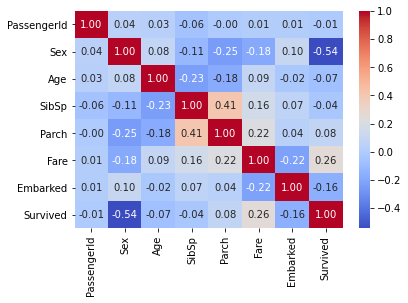

In [ ]:
sns.heatmap(titanic_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

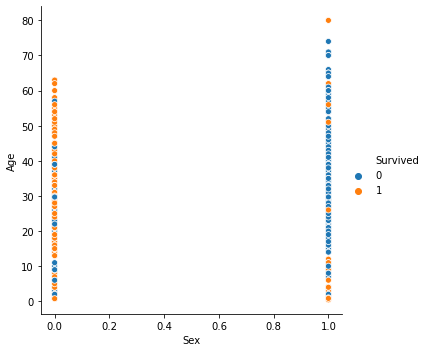

In [ ]:
sns.relplot(x='Sex',y='Age',data=titanic_train,hue='Survived')

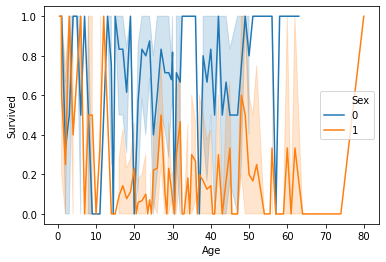

In [ ]:
sns.lineplot(x='Age',y='Survived',hue='Sex',data = titanic_train)

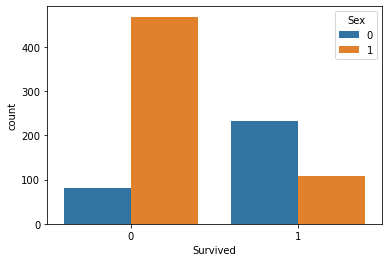

In [ ]:

sns.countplot(x='Survived',hue='Sex',data=titanic_train)

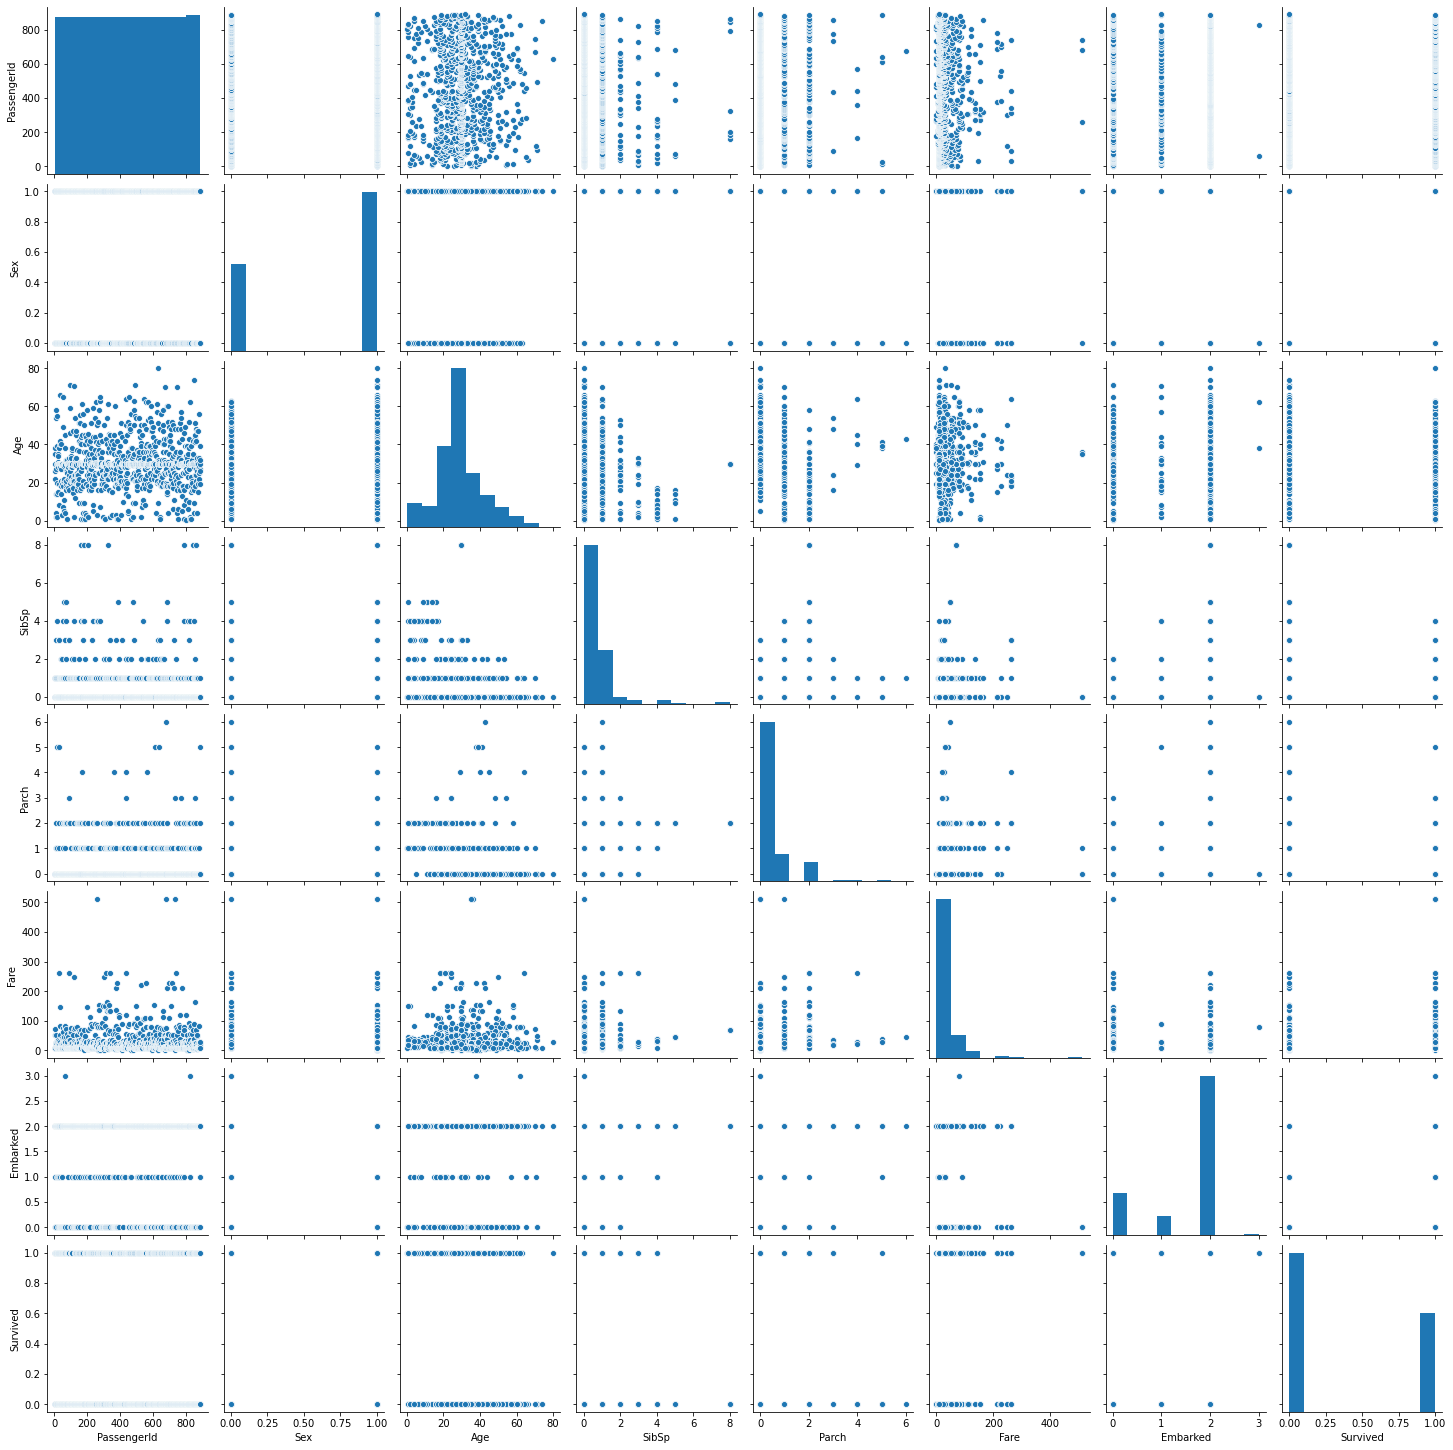

In [ ]:
sns.pairplot(titanic_train)

In [ ]:
titanic_test = pd.read_csv('test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:

titanic_test = titanic_test.drop(['Name','Cabin','Ticket','Pclass'],axis=1)

In [ ]:
titanic_test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,male,34.5,0,0,7.8292,Q
1,893,female,47.0,1,0,7.0000,S
2,894,male,62.0,0,0,9.6875,Q
3,895,male,27.0,0,0,8.6625,S
4,896,female,22.0,1,1,12.2875,S


In [ ]:
# encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
titanic_test['Sex']= le.fit_transform(titanic_test['Sex']) 

titanic_test['Embarked']= le.fit_transform(titanic_test['Embarked'].astype(str)) 

In [ ]:
titanic_test.head()


,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,1,34.5,0,0,7.8292,1
1,893,0,47.0,1,0,7.0000,2
2,894,1,62.0,0,0,9.6875,1
3,895,1,27.0,0,0,8.6625,2
4,896,0,22.0,1,1,12.2875,2


In [ ]:
titanic_test.isna().any()

PassengerId    False
Sex            False
Age            True 
SibSp          False
Parch          False
Fare           True 
Embarked       False
dtype: bool

In [ ]:
titanic_test.replace('?',np.NaN,inplace=True)


In [ ]:
# handling missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN)
imp=imp.fit(titanic_test[['Age']])
titanic_test['Age']=imp.transform(titanic_test[['Age']])

In [ ]:
# handling missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN)
imp=imp.fit(titanic_test[['Fare']])
titanic_test['Fare']=imp.transform(titanic_test[['Fare']])

In [ ]:
titanic_test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,1,34.5,0,0,7.8292,1
1,893,0,47.0,1,0,7.0000,2
2,894,1,62.0,0,0,9.6875,1
3,895,1,27.0,0,0,8.6625,2
4,896,0,22.0,1,1,12.2875,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_train.drop(['Survived','PassengerId'],axis=1), 
                                                    titanic_train['Survived'], test_size=0.20, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.85      0.69      0.76        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



In [ ]:
# predict on the test data 
id = titanic_test['PassengerId']
predictions = logmodel.predict(titanic_test.drop('PassengerId', axis=1))
result = pd.DataFrame({ 'PassengerId' : id, 'Survived': predictions })
result.head()



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
result.to_csv('titanic-pred.csv', index = False)